In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

from scipy import misc
from scipy import ndimage
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Populating the interactive namespace from numpy and matplotlib


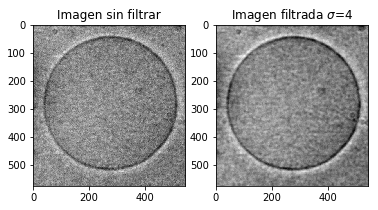

In [4]:
image_rgb = pylab.imread("ves_full_150_002.jpg")
image_gray = color.rgb2gray(image_rgb)
image_denoised = ndimage.median_filter(image_gray, 4)
plt.subplot(121)
plt.title('Imagen sin filtrar')
plt.imshow(image_gray);
pylab.gray()
plt.subplot(122)
plt.title('Imagen filtrada $\sigma$=4')
plt.imshow(image_denoised);
pylab.gray()

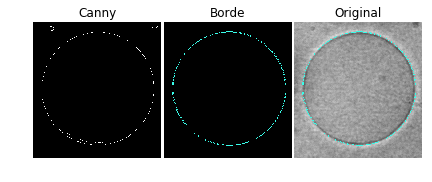

In [5]:
edges = canny(image_denoised, sigma=3)

hough_radii = np.arange(240,250,260)
hough_res = hough_circle(edges,hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
im = np.zeros((576, 544))
im = color.gray2rgb(im)
fig, ax = plt.subplots(ncols=1, nrows=1)
image_denoised = color.gray2rgb(image_denoised)
centroy=[]
centrox=[]
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    centroy.append(center_y)
    centrox.append(center_x)
    image_denoised[circy, circx] = (200, 3, 23)
    im[circy, circx] = (200, 3, 23)

plt.subplot(131)
plt.title('Canny')
plt.imshow(edges);
plt.axis('off')
plt.subplot(132)
plt.title('Borde')
plt.imshow(im);
plt.axis('off')
plt.subplot(133)
plt.title('Original')
plt.imshow(image_denoised);
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

In [6]:
print("El centroide del cilrculo tiene las cordenadas x,y de (", mean(centrox),",", np.round(mean(centroy),1),")" )

El centroide del cilrculo tiene las cordenadas x,y de ( 277.0 , 281.7 )


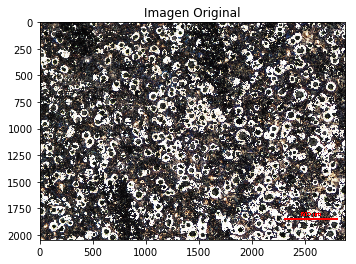

In [9]:
gran = pylab.imread("FeNod_50X_L.tif")
#print imagen
pylab.imshow(gran, cmap = cm.Greys_r);
plt.title('Imagen Original', fontsize=12);

1.018

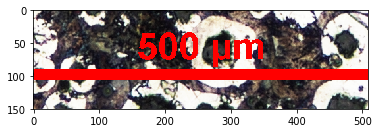

In [42]:
lenmin=2295
lenmax=2804
crop_face = gran[1750:1900,lenmin:lenmax, :]
plt.imshow(crop_face)
pxlsz=(lenmax-lenmin)/500 #Tamaño en micras de cada pixel

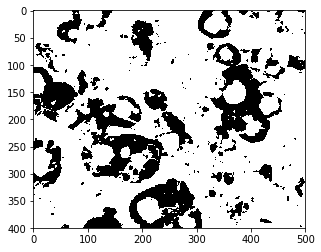

In [49]:
import cv2

gray = cv2.cvtColor(gran,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
crop = thresh[1500:1900,0:500]
plt.imshow(crop)

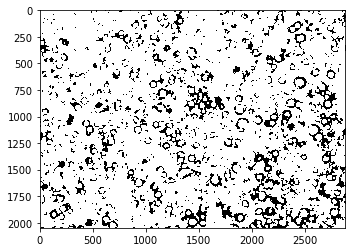

In [63]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_bg)

In [64]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_bg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [67]:
markers = cv2.watershed(img,markers)
gran[markers == -1] = [255,0,0]
plt.imshow(gran)

error: C:\projects\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function cv::watershed


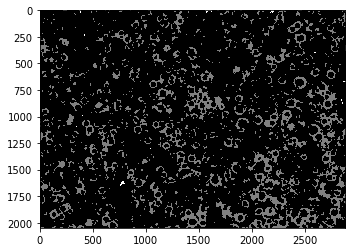

In [65]:
plt.imshow(markers)

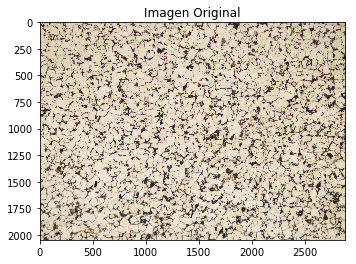

In [69]:
gran2 = pylab.imread("200x_1010_T.tif")
#print imagen
pylab.imshow(gran2, cmap = cm.Greys_r);
plt.title('Imagen Original', fontsize=12);

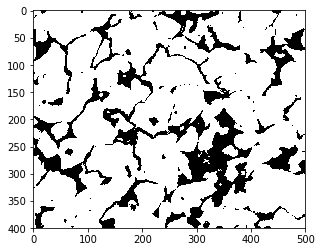

In [73]:
gray = cv2.cvtColor(gran2,cv2.COLOR_BGR2GRAY)
ret2, thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
crop2 = thresh2[1500:1900,0:500]
plt.imshow(crop2)

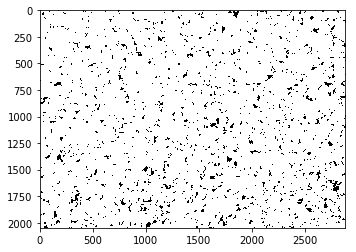

In [78]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh2,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(thresh2,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh2,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_bg)